# install Packages

In [152]:
#pip install wordcloud
#pip install emoji
#pip install textblob

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import nltk

# Load data

In [3]:
# read file
data=pd.read_csv('TweetExporter-BBCBreaking-200-tweets.csv')

# Inspect data

In [4]:
data.head(5)

,Tweet ID,Tweet Text,Type,Author Name,Author Username,Creation Time,Reply Count,Retweet Count,Quote Count,Like Count,View Count,Bookmark Count,Language,Possibly Sensitive,Source,Hashtags,Tweet URL,Media Type,Media URLs,External URLs
0,"=""1829139390901215250""",Woman who stole mobility scooter and left disa...,Tweet,BBC Breaking News,BBCBreaking,"29/8/2024, 6:19:49 pm",194,124,39,582,268510,33,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1829139390901...,NaN,NaN,https://bbc.in/47achZR
1,"=""1828889219000926333""",Telegram chief Pavel Durov placed under formal...,Tweet,BBC Breaking News,BBCBreaking,"29/8/2024, 1:45:43 am",149,157,17,585,325265,28,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1828889219000...,NaN,NaN,https://bbc.in/4dAYL3U
2,"=""1828748677566865444""",At least nine Palestinians killed as Israel la...,Tweet,BBC Breaking News,BBCBreaking,"28/8/2024, 4:27:15 pm",236,168,18,299,303710,18,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1828748677566...,NaN,NaN,https://bbc.in/478L0Hd
3,"=""1828471948101251257""",Two men charged with four counts of murder and...,Tweet,BBC Breaking News,BBCBreaking,"27/8/2024, 10:07:38 pm",0,81,17,314,329494,18,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1828471948101...,NaN,NaN,https://bbc.in/3XlqMqE
4,"=""1828415564307403177""",Israel says it has rescued a hostage being hel...,Tweet,BBC Breaking News,BBCBreaking,"27/8/2024, 6:23:35 pm",192,99,12,616,311600,10,en,No,SocialFlow,NaN,https://x.com/BBCBreaking/status/1828415564307...,NaN,NaN,https://bbc.in/3MHrVml


In [5]:
# delete unwanted columns
columns_to_remove = ['Tweet ID', 'Type', 'Author Name', 'Author Username', 'Creation Time',
    'Reply Count', 'Retweet Count', 'Quote Count', 'Like Count', 'View Count',
    'Bookmark Count', 'Language', 'Possibly Sensitive', 'Source', 'Hashtags',
    'Tweet URL', 'Media Type', 'Media URLs', 'External URLs']
data.drop(columns=columns_to_remove, inplace=True)

In [6]:
# create dataframe
df=pd.DataFrame(data)
pd.set_option('display.max_rows', None)
#data
df.head(10)

,Tweet Text
0,Woman who stole mobility scooter and left disa...
1,Telegram chief Pavel Durov placed under formal...
2,At least nine Palestinians killed as Israel la...
3,Two men charged with four counts of murder and...
4,Israel says it has rescued a hostage being hel...
5,Ukraine says it has made further advances duri...
6,Three arrested over stabbing of woman believed...
7,Oasis to reunite for world tour next year kick...
8,Former England football manager Sven-Goran Eri...
9,At least three people killed and dozens injure...


# Text Preprocessing

In [20]:
# cleaning tweet text
def cleanTweet(text):
    text=re.sub(r'#','',text) # remove #
    text=re.sub(r'[:",-]', '', text) # remove :,",- and ,
    text = re.sub(r'https\/\/\S+','',text)# remove url
    text = re.sub(r'\s+',' ',text).strip()#remove extra whitespace:
    patterns = ["follow live", "Watch and","read more","watch live","follow updates","live updates"]# remove pattern,emoji
    for pattern in patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)
        text = emoji.replace_emoji(text, replace='')
    return text
df['Tweet Text']=df['Tweet Text'].apply(cleanTweet)

In [21]:
df.to_csv('cleanedTweet.csv', index=False)
# text to lower case
df['Tweet Text'] = df['Tweet Text'].apply(lambda x: x.lower())

# Clean Tweeet

In [22]:
df.head(10)

,Tweet Text,Lemmatized Tweet Text,Subjectivity,Polarity
0,woman who stole mobility scooter and left disa...,woman who stole mobility scooter and left disa...,0.15,-0.100
1,telegram chief pavel durov placed under formal...,telegram chief pavel durov placed under formal...,0.00,0.000
2,at least nine palestinians killed as israel la...,at least nine palestinian killed a israel laun...,0.20,-0.250
3,two men charged with four counts of murder and...,two men charged with four count of murder and ...,0.00,-0.200
4,israel says it has rescued a hostage being hel...,israel say it ha rescued a hostage being held ...,0.20,-0.150
5,ukraine says it has made further advances duri...,ukraine say it ha made further advance during ...,0.25,0.000
6,three arrested over stabbing of woman believed...,three arrested over stabbing of woman believed...,0.80,-0.600
7,oasis to reunite for world tour next year kick...,oasis to reunite for world tour next year kick...,0.00,0.000
8,former england football manager svengoran erik...,former england football manager svengoran erik...,0.20,-0.050
9,at least three people killed and dozens injure...,at least three people killed and dozen injured...,0.35,-0.125


In [23]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tweet Text             200 non-null    object 
 1   Lemmatized Tweet Text  200 non-null    object 
 2   Subjectivity           200 non-null    float64
 3   Polarity               200 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [24]:
# Total rows and columns
df.shape

(200, 4)

In [25]:
# downloading wordnet data
nltk.download('wordnet')
# lemmatization function
def lemmatizedText(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# function for subjectivity 
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# function for polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [41]:
# 2 columns
df['Lemmatized Tweet Text'] = df['Tweet Text'].apply(lemmatizedText)
df['Subjectivity']=df['Lemmatized Tweet Text'].apply(subjectivity)
df['Polarity']=df['Lemmatized Tweet Text'].apply(polarity)

# data
df.head(10)

,Tweet Text,Lemmatized Tweet Text,Subjectivity,Polarity,Analysis
0,woman who stole mobility scooter and left disa...,woman who stole mobility scooter and left disa...,0.15,-0.100,Negative
1,telegram chief pavel durov placed under formal...,telegram chief pavel durov placed under formal...,0.00,0.000,Neutral
2,at least nine palestinians killed as israel la...,at least nine palestinian killed a israel laun...,0.20,-0.250,Negative
3,two men charged with four counts of murder and...,two men charged with four count of murder and ...,0.00,-0.200,Negative
4,israel says it has rescued a hostage being hel...,israel say it ha rescued a hostage being held ...,0.20,-0.150,Negative
5,ukraine says it has made further advances duri...,ukraine say it ha made further advance during ...,0.25,0.000,Neutral
6,three arrested over stabbing of woman believed...,three arrested over stabbing of woman believed...,0.80,-0.600,Negative
7,oasis to reunite for world tour next year kick...,oasis to reunite for world tour next year kick...,0.00,0.000,Neutral
8,former england football manager svengoran erik...,former england football manager svengoran erik...,0.20,-0.050,Negative
9,at least three people killed and dozens injure...,at least three people killed and dozen injured...,0.35,-0.125,Negative


# Word Colud

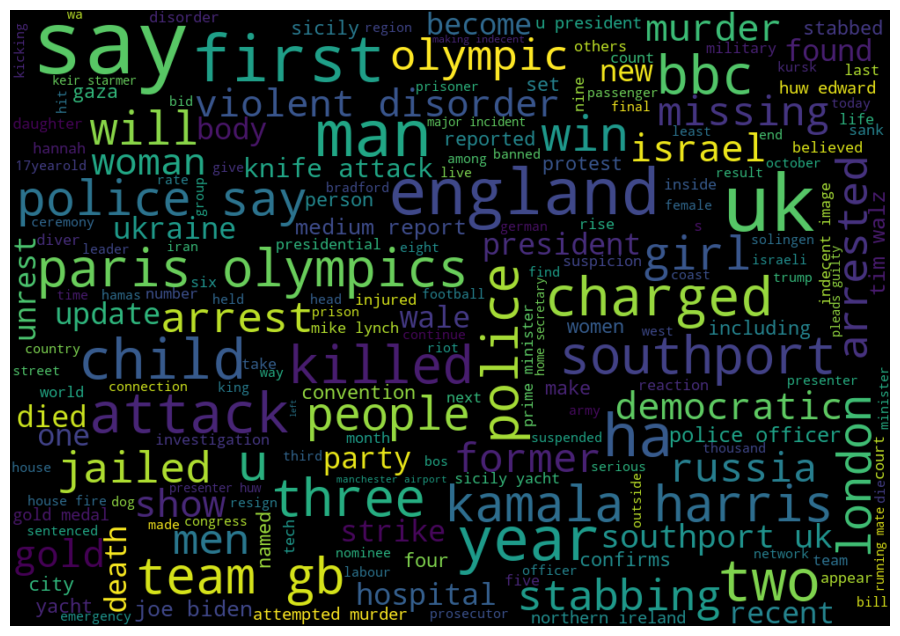

In [42]:
#Frequent words
allWords = " ".join([tweet for tweet in df['Lemmatized Tweet Text']])
wordcloud = WordCloud(width = 1000, height = 700 , random_state = 42, max_font_size = 100).generate(allWords)
# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [43]:
# function for -ve,+ve and neutral analysis
def polarityAnalaysis(point):
    if point < 0:
        return 'Negative'
    elif point > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [44]:
# new column 
df['Analysis']=df['Polarity'].apply(polarityAnalaysis)
#data
df.head(10)

,Tweet Text,Lemmatized Tweet Text,Subjectivity,Polarity,Analysis
0,woman who stole mobility scooter and left disa...,woman who stole mobility scooter and left disa...,0.15,-0.100,Negative
1,telegram chief pavel durov placed under formal...,telegram chief pavel durov placed under formal...,0.00,0.000,Neutral
2,at least nine palestinians killed as israel la...,at least nine palestinian killed a israel laun...,0.20,-0.250,Negative
3,two men charged with four counts of murder and...,two men charged with four count of murder and ...,0.00,-0.200,Negative
4,israel says it has rescued a hostage being hel...,israel say it ha rescued a hostage being held ...,0.20,-0.150,Negative
5,ukraine says it has made further advances duri...,ukraine say it ha made further advance during ...,0.25,0.000,Neutral
6,three arrested over stabbing of woman believed...,three arrested over stabbing of woman believed...,0.80,-0.600,Negative
7,oasis to reunite for world tour next year kick...,oasis to reunite for world tour next year kick...,0.00,0.000,Neutral
8,former england football manager svengoran erik...,former england football manager svengoran erik...,0.20,-0.050,Negative
9,at least three people killed and dozens injure...,at least three people killed and dozen injured...,0.35,-0.125,Negative


In [45]:
# Positive tweets
positiveTweets = df[df['Analysis'] == 'Positive']
i=1
for tweet in positiveTweets['Lemmatized Tweet Text']:
    print(str(i) + ')' + tweet)
    i=i+1

1)major incident declared and search and rescue continues after fire at block of flat in london
2)family release first picture of mike lynch and daughter hannah after sixth body found in sicily yacht wreckage
3)influencer andrew tate placed under house arrest a romanian prosecutor probe new human trafficking and sexual exploitation allegation
4)first drug to slow progression of earlystage alzheimer's approved by uk regulator but will not be available on the nh
5)gcse pas rate across england wale and northern ireland fall for third year running with 67.6% of grade marked at 4/c or above
6)man dy after being attacked by his own xl bully dog at home in accrington uk
7)update this article originally reported that police in pakistan had told the bbc that farhan asif had been charged with cyber terrorism. the police have since confirmed that he is under arrest but ha not been charged and we have updated our article to make that clear.
8)bbc presenter lauren laverne say she ha been diagnosed 

In [46]:
#percentage of +ve tweets
round((positiveTweets.shape[0]/df.shape[0])*100,1)

31.0

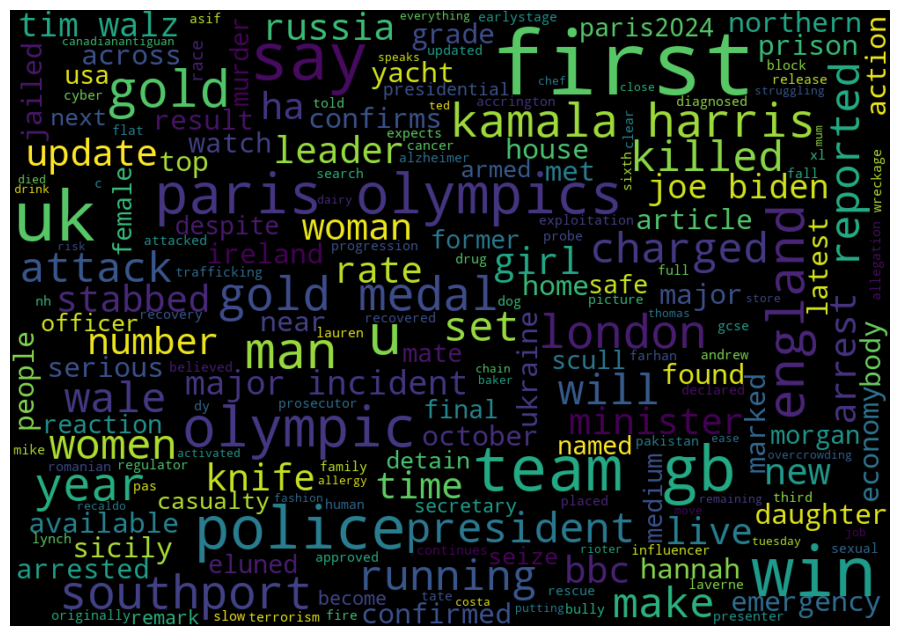

In [47]:
#Frequent words for +ve words
allWords = " ".join( tweet for tweet in positiveTweets['Lemmatized Tweet Text'])
wordcloud = WordCloud(width = 1000, height = 700 , random_state = 42, max_font_size = 100).generate(allWords)
# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [48]:
# Negative tweets
negativeTweets = df[df['Analysis'] == 'Negative']
i=1
for tweet in negativeTweets['Lemmatized Tweet Text']:
    print(str(i) + ')' + tweet)
    i=i+1

1)woman who stole mobility scooter and left disabled man to die in freezing weather jailed for sixandahalf year
2)at least nine palestinian killed a israel launch operation in occupied west bank and troop surround jenin hospital
3)two men charged with four count of murder and one attempted murder after house fire killed mother and her three child in bradford uk
4)israel say it ha rescued a hostage being held by hamas during a complex operation in southern gaza
5)three arrested over stabbing of woman believed to have been caught up in a fight between two group of men at notting hill carnival
6)former england football manager svengoran eriksson ha died aged 76
7)at least three people killed and dozen injured a wave of russian strike hit key energy target in ukraine
8)german police say person arrested in connection with solingen knife attack is aged 15 and they cannot rule out a terrorist motive
9)german police say a person ha been detained over a possible connection to deadly knife attac

In [49]:
#percentage of -ve tweets
round((negativeTweets.shape[0]/df.shape[0])*100,1)

33.5

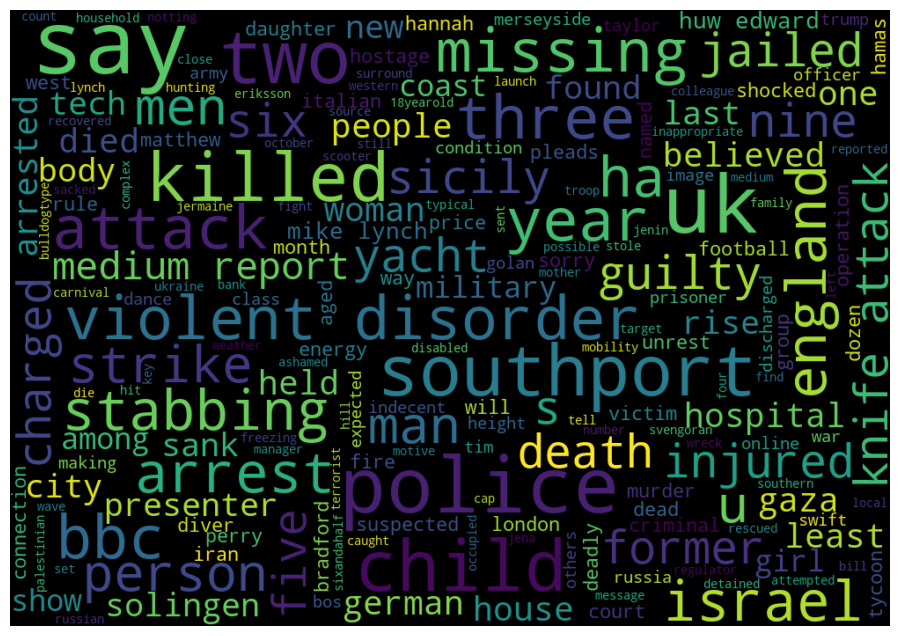

In [50]:
#Frequent words for -ve words
allWords = " ".join( tweet for tweet in negativeTweets['Lemmatized Tweet Text'])
wordcloud = WordCloud(width = 1000, height = 700 , random_state = 42, max_font_size = 100).generate(allWords)
# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [51]:
# Neutarl tweets
neutarlTweets = df[df['Analysis'] == 'Neutral']
i=1
for tweet in neutarlTweets['Lemmatized Tweet Text']:
    print(str(i) + ')' + tweet)
    i=i+1


1)telegram chief pavel durov placed under formal investigation in france and banned from leaving country prosecutor say
2)ukraine say it ha made further advance during kursk incursion and control 100 russian settlement
3)oasis to reunite for world tour next year kicking off in cardiff manchester and london 15 year after band broke up
4)two astronaut whose eightday mission got stuck in space will return to earth on spacex ship next year nasa say
5)investigation into sicily yacht death considering multiple option including manslaughter official say
6)robert f kennedy jr suspends independent presidential bid and will support donald trump
7)man 32 charged with murder over death of parcel delivery driver claudiucarol kondor in leeds england
8)kamala harris to make pitch to “all americans” a she accepts democratic nomination for president
9)the one show and match of the day presenter jermaine jena sacked by bbc over workplace conduct source say
10)hundred of thousand of student in england wa

In [52]:
#percentage of +ve tweets
round((neutarlTweets.shape[0]/df.shape[0])*100,1)

35.5

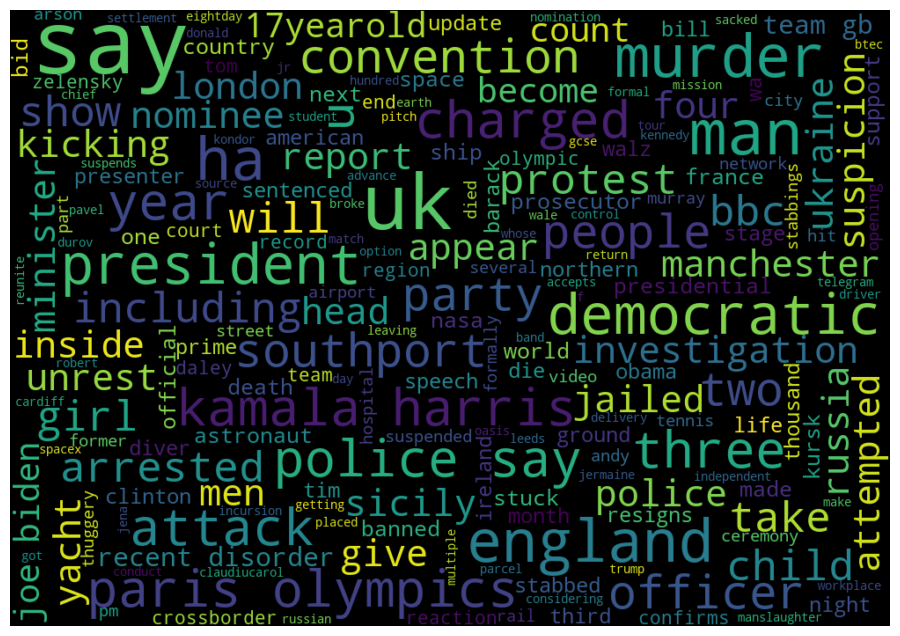

In [54]:
#Frequent words for neutral words
allWords = " ".join( tweet for tweet in neutarlTweets['Lemmatized Tweet Text'])
wordcloud = WordCloud(width = 1000, height = 700 , random_state = 42, max_font_size = 100).generate(allWords)
# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

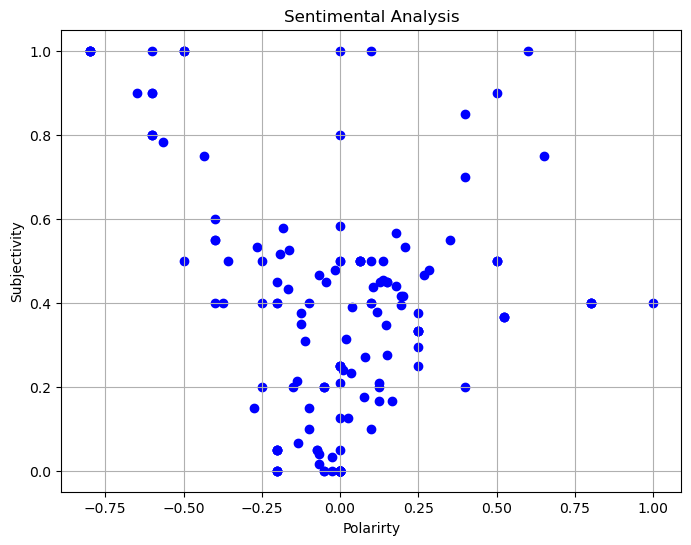

In [55]:
# Plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentimental Analysis')
plt.xlabel('Polarirty')
plt.ylabel('Subjectivity')
plt.grid(True) 
plt.show()

<Axes: title={'center': 'Sentimental Analysis'}, xlabel='Analysis', ylabel='Count'>

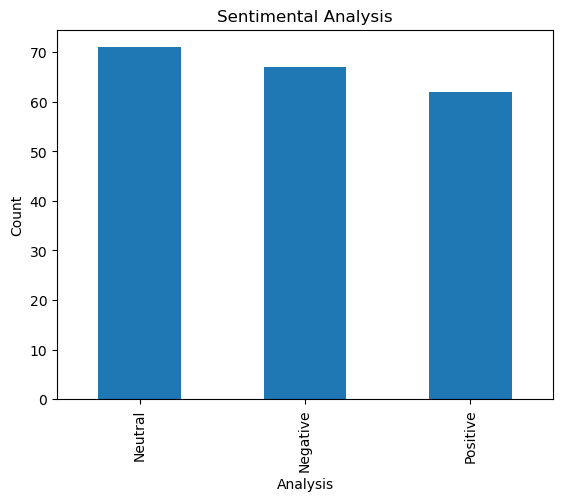

In [56]:
#shows value count
df['Analysis'].value_counts()
#plot graph
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')

In [57]:
df.head(10)

,Tweet Text,Lemmatized Tweet Text,Subjectivity,Polarity,Analysis
0,woman who stole mobility scooter and left disa...,woman who stole mobility scooter and left disa...,0.15,-0.100,Negative
1,telegram chief pavel durov placed under formal...,telegram chief pavel durov placed under formal...,0.00,0.000,Neutral
2,at least nine palestinians killed as israel la...,at least nine palestinian killed a israel laun...,0.20,-0.250,Negative
3,two men charged with four counts of murder and...,two men charged with four count of murder and ...,0.00,-0.200,Negative
4,israel says it has rescued a hostage being hel...,israel say it ha rescued a hostage being held ...,0.20,-0.150,Negative
5,ukraine says it has made further advances duri...,ukraine say it ha made further advance during ...,0.25,0.000,Neutral
6,three arrested over stabbing of woman believed...,three arrested over stabbing of woman believed...,0.80,-0.600,Negative
7,oasis to reunite for world tour next year kick...,oasis to reunite for world tour next year kick...,0.00,0.000,Neutral
8,former england football manager svengoran erik...,former england football manager svengoran erik...,0.20,-0.050,Negative
9,at least three people killed and dozens injure...,at least three people killed and dozen injured...,0.35,-0.125,Negative


# Advanced Text Processing(Lemmatization)

# Model Building

In [58]:
#machine learning models to predict sentiment
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Lemmatized Tweet Text'])
y = df['Analysis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred))



Classification Report :

              precision    recall  f1-score   support

    Negative       0.54      0.54      0.54        13
     Neutral       0.47      0.56      0.51        16
    Positive       0.62      0.45      0.53        11

    accuracy                           0.53        40
   macro avg       0.55      0.52      0.53        40
weighted avg       0.54      0.53      0.53        40



#
<h1>Obervartion:</h1>
<ul>
    <li><strong>Precision:</strong> This measures the accuracy of the positive predictions.
        <ol>
            <li>0.50 for Negative means that 50% of the tweets predicted as Negative were actually Negative.</li>
            <li>0.43 for Neutral means that 43% of the tweets predicted as Neutral were actually Neutral.</li>
            <li>0.56 for Positive means that 56% of the tweets predicted as Positive were actually Positive.</li>
        </ol>
    </li>
    <li><strong>Recall:</strong> This measures the ability of the model to find all the relevant cases within a dataset.
         <ol>
            <li>0.31 for Negative means that the model identified 31% of all actual Negative tweets.</li>
            <li>0.62 for Neutral means that the model identified 62% of all actual Neutral tweets.</li>
            <li>0.45 for Positive means that the model identified 45% of all actual Positive tweets.</li>
         </ol>
    </li>
    <li><strong>F1-Score:</strong> This is the harmonic mean of precision and recall, providing a balance between the two.
        <ol>
            <li> 0.38,0.51 and 0.50 indicates a balance between precision and recall for Negative ,Neutral and Positive.</li>
        </ol>
    </li>
    <li><strong>Support:</strong> This is the number of actual occurrences of each class in the dataset.
        <ol>
            <li>There are 13 Negative tweets, 16 Neutral tweets, and 11 Positive tweets.</li>
        </ol>

   </li> 
</ul>

#
<h1>Overall</h1>
<ul>
        <li><strong>Accuracy:</strong> The accuracy of the model is 0.47,which meanse model correctly predicted the sentiment of 47% of the tweets.</li>
        <li><strong>Macro Average:</strong> This is the average of precision, recall, and F1-score for all classes, treating all classes equally. Here, the macro average F1-score is 0.46.</li>
        <li><strong>Weighted Average:</strong> This is the average of precision, recall, and F1-score for all classes, weighted by the number of true instances for each class. The weighted average F1-score is 0.47.</li>
    </ul>

#
<h1>conclusion </h1>
    <p>The model performs better on Neutral tweets butnot as much withh Negative tweet).</p>
    <The overall accuracy and F1-scores indicate that the model needs more improvement mainly in differentiating between Negative and Positive sentiments more preciselyts.</p>